In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/heart-attack-analysis-prediction-dataset/o2Saturation.csv
/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv


In [2]:
df=pd.read_csv('/kaggle/input/heart-attack-analysis-prediction-dataset/heart.csv')
df.head(5)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
df.shape

(303, 14)

In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df.output.value_counts()

output
1    165
0    138
Name: count, dtype: int64

Text(0.5, 1.0, '(0: less chance  ||  1 : more chance)')

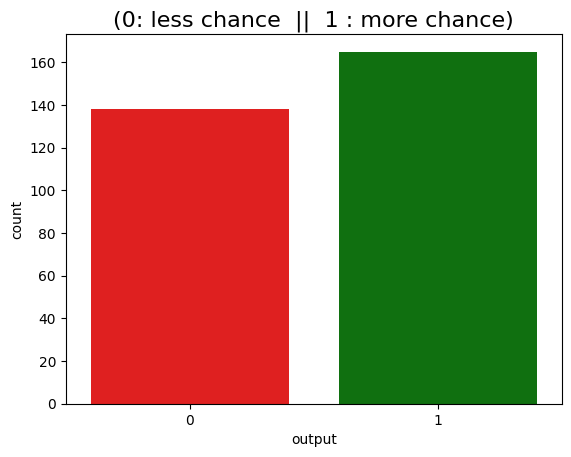

In [9]:
colors = ["red", "green"]

sns.countplot(x='output',data=df,palette=colors)
plt.title('(0: less chance  ||  1 : more chance)', fontsize=16)

In [10]:
df[df['sex']==0]['output'].value_counts()

output
1    72
0    24
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


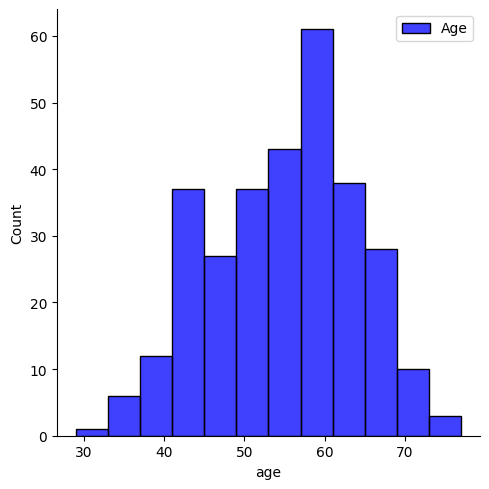

In [11]:

sns.displot(df.age, color="blue", label="Age")
plt.legend()

fbs
0    258
1     45
Name: count, dtype: int64


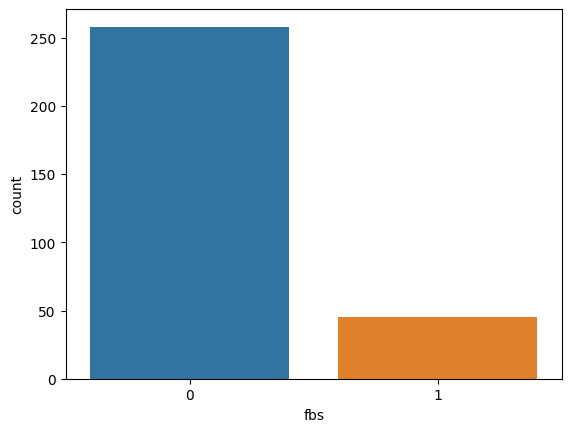

In [12]:
b=df.fbs.value_counts()
print(b)


sns.countplot(x='fbs',data=df)
plt.show()


restecg
1    152
0    147
2      4
Name: count, dtype: int64


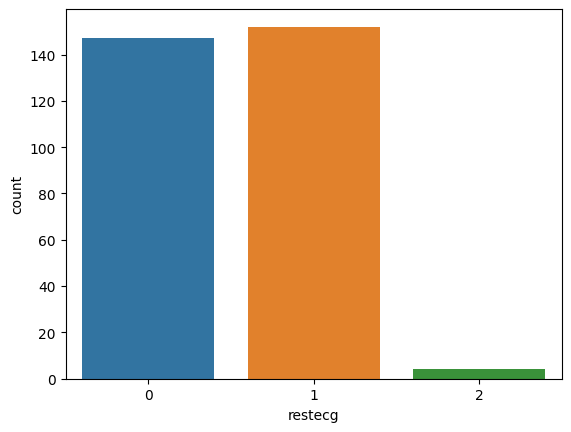

In [13]:
b=df.restecg.value_counts()

print(b)

sns.countplot(x='restecg',data=df)
plt.show()


exng
0    204
1     99
Name: count, dtype: int64


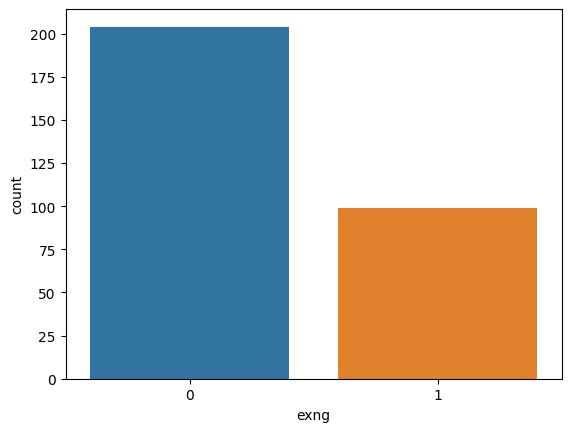

In [14]:
b=df.exng.value_counts()


print(b)

sns.countplot(x='exng',data=df)
plt.show()


In [15]:
b=df.oldpeak.value_counts()

print(b)

oldpeak
0.0    99
1.2    17
1.0    14
0.6    14
1.4    13
0.8    13
0.2    12
1.6    11
1.8    10
0.4     9
2.0     9
0.1     7
2.8     6
2.6     6
1.5     5
3.0     5
1.9     5
0.5     5
3.6     4
2.2     4
2.4     3
0.9     3
3.4     3
4.0     3
0.3     3
2.3     2
3.2     2
2.5     2
4.2     2
1.1     2
3.1     1
0.7     1
3.5     1
6.2     1
1.3     1
5.6     1
2.9     1
2.1     1
3.8     1
4.4     1
Name: count, dtype: int64


slp
2    142
1    140
0     21
Name: count, dtype: int64


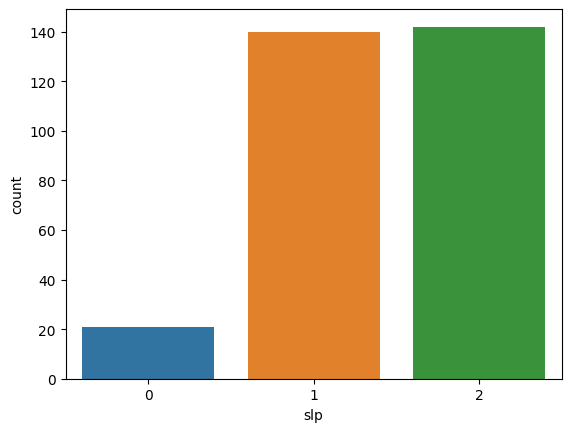

In [16]:
b=df.slp.value_counts()
print(b)

sns.countplot(x='slp',data=df)
plt.show()


caa
0    175
1     65
2     38
3     20
4      5
Name: count, dtype: int64


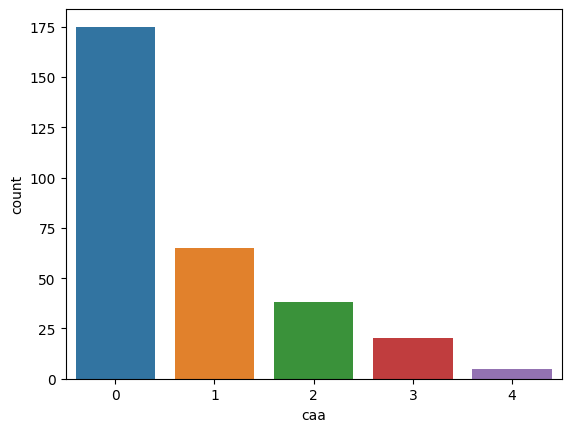

In [17]:
b=df.caa.value_counts()
print(b)

sns.countplot(x='caa',data=df)
plt.show()


thalachh
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64


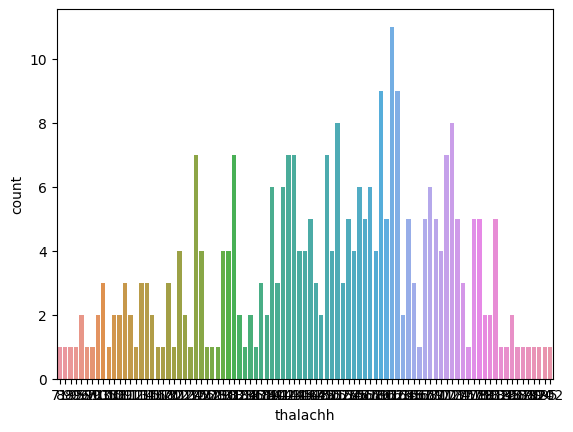

In [18]:
b=df.thalachh.value_counts()
print(b)

sns.countplot(x='thalachh',data=df)
plt.show()


thall
2    166
3    117
1     18
0      2
Name: count, dtype: int64


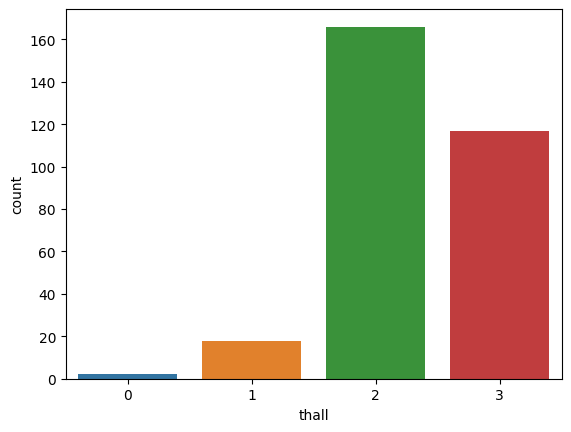

In [19]:
b=df.thall.value_counts()
print(b)

sns.countplot(x='thall',data=df)
plt.show()

In [20]:
from sklearn.preprocessing import Normalizer
nom=Normalizer(norm='l2')
data_norm=nom.fit_transform(df)

<Axes: >

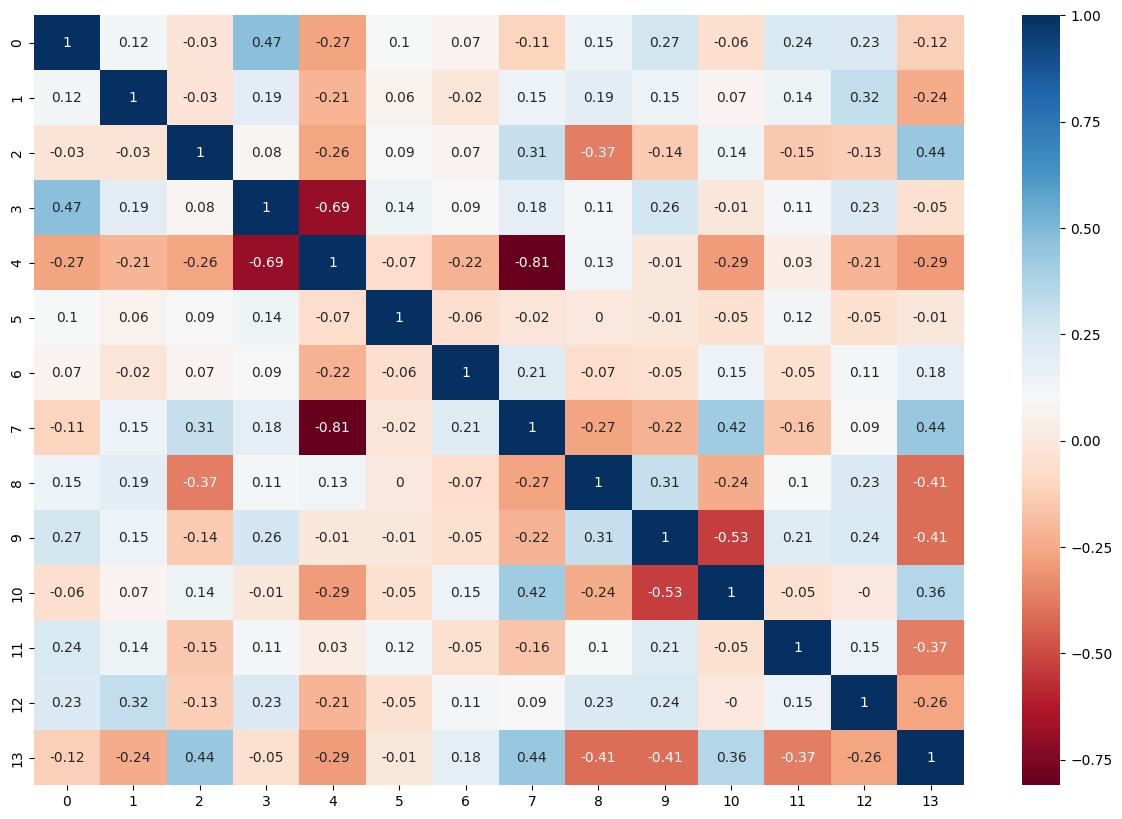

In [21]:
import numpy as np
corr=np.corrcoef(data_norm,rowvar=False)

plt.figure(figsize=(15,10))
corr_rounded = np.round(corr,2)
sns.heatmap(corr_rounded, cmap='RdBu', annot=True)

In [22]:
x=df.iloc[:,[1,2,3,5,6,7,8,9,10,11,12]]
y=df.iloc[:,-1]


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)


# SVM

In [25]:
sv=SVC(kernel='linear',random_state=5)
sv.fit(x_train,y_train)


SVC(kernel='linear', random_state=5)

In [26]:
pre=sv.predict(x_test)
acc=accuracy_score(y_test,pre)
print('accuarcy is : ',acc)

accuarcy is :  0.8688524590163934


# RandomForest

In [27]:
randm=RandomForestClassifier(random_state=3)
randm.fit(x_train,y_train)


RandomForestClassifier(random_state=3)

In [28]:
pred1=randm.predict(x_test)
acc=accuracy_score(y_test,pred1)
print('accuarcy is : ',acc)

accuarcy is :  0.9016393442622951
